In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
from pathlib import Path
import seaborn as sns
import numpy as np

In [2]:
path_ds:Path = Path(".") / "datasets"

In [3]:
#Cargar la data
df = pd.read_csv(path_ds / 'DEvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778)
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044)
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748)
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866)


In [22]:
df.describe()

,trending_date,category_id,views,likes,dislikes,comment_count,lat,lon
count,40840,40840.000000,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04,40840.000000,40840.000000
mean,2018-02-27 01:19:32.732615168,20.705828,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03,51.797150,10.216911
min,2017-11-14 00:00:00,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00,48.999992,6.970003
25%,2018-01-04 00:00:00,20.000000,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01,50.266607,8.399993
50%,2018-02-26 00:00:00,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02,52.029988,9.500030
75%,2018-04-24 00:00:00,24.000000,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03,53.550025,11.416699
max,2018-06-14 00:00:00,44.000000,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06,54.783748,14.329967
std,NaN,6.975813,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04,1.639008,2.042100


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40840 non-null  object        
 1   trending_date           40840 non-null  datetime64[ns]
 2   title                   40840 non-null  object        
 3   channel_title           40840 non-null  object        
 4   category_id             40840 non-null  int64         
 5   publish_time            40840 non-null  object        
 6   tags                    40840 non-null  object        
 7   views                   40840 non-null  int64         
 8   likes                   40840 non-null  int64         
 9   dislikes                40840 non-null  int64         
 10  comment_count           40840 non-null  int64         
 11  thumbnail_link          40840 non-null  object        
 12  comments_disabled       40840 non-null  bool  

In [4]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

**VISUALIZACION DE DATOS**

In [11]:
sns.set(style="whitegrid")

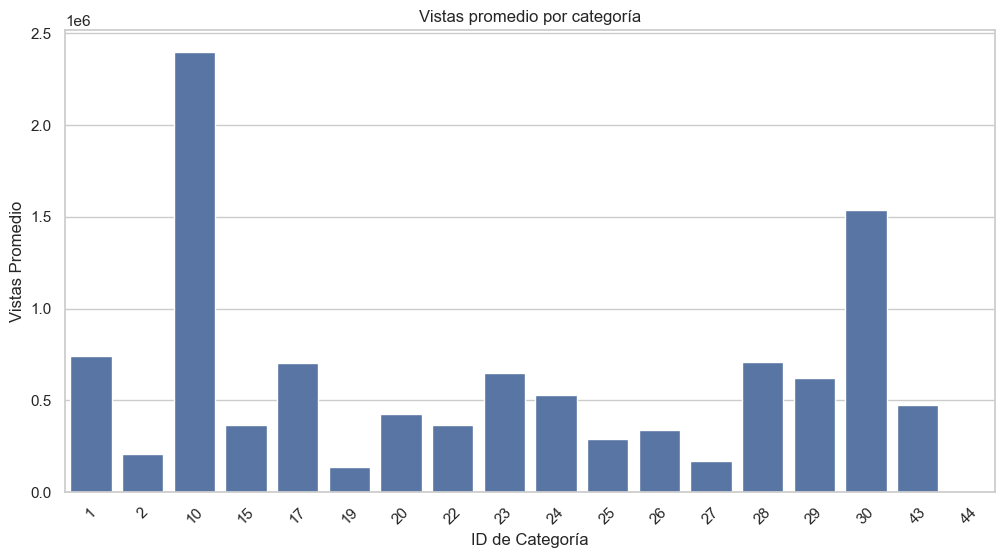

In [12]:
#Category ID vs Views
plt.figure(figsize=(12, 6))
category_views = df.groupby('category_id')['views'].mean().reset_index()
sns.barplot(x='category_id', y='views', data=category_views)
plt.title('Vistas promedio por categoría')
plt.xlabel('ID de Categoría')
plt.ylabel('Vistas Promedio')
plt.xticks(rotation=45)
plt.show()

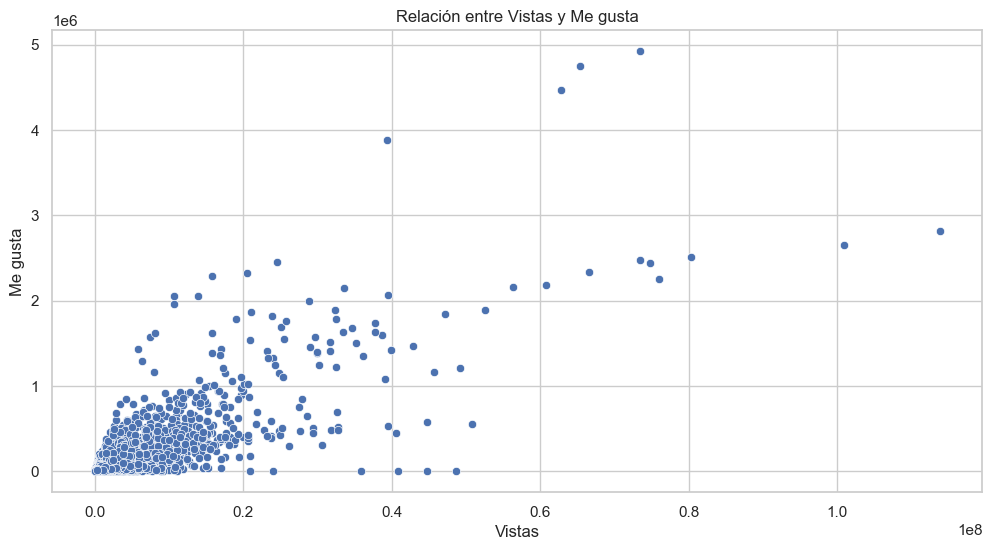

In [13]:
#Views vs Likes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='views', y='likes', data=df)
plt.title('Relación entre Vistas y Me gusta')
plt.xlabel('Vistas')
plt.ylabel('Me gusta')
plt.show()

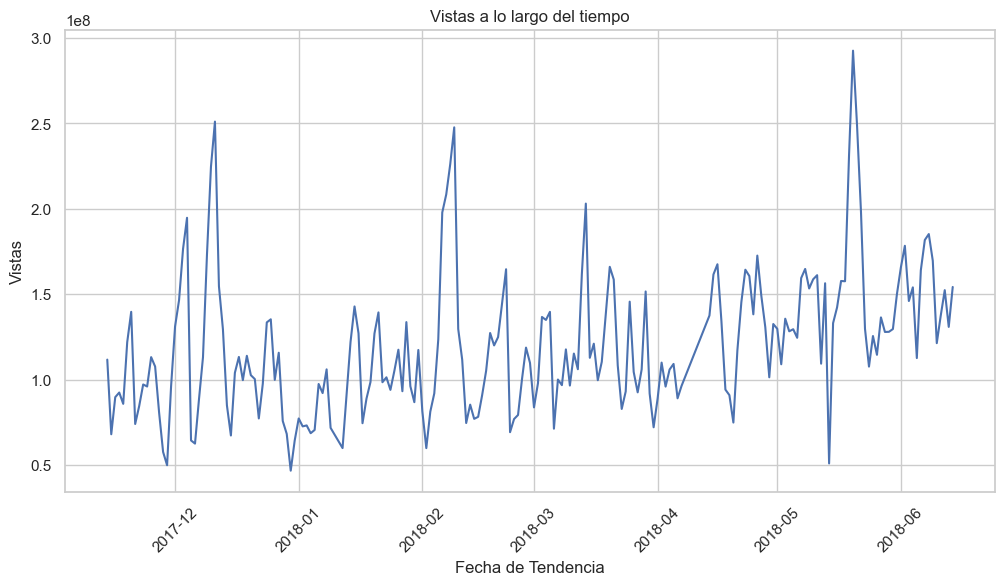

In [14]:
#Trending Date vs Views
plt.figure(figsize=(12, 6))
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
date_views = df.groupby('trending_date')['views'].sum().reset_index()
sns.lineplot(x='trending_date', y='views', data=date_views)
plt.title('Vistas a lo largo del tiempo')
plt.xlabel('Fecha de Tendencia')
plt.ylabel('Vistas')
plt.xticks(rotation=45)
plt.show()

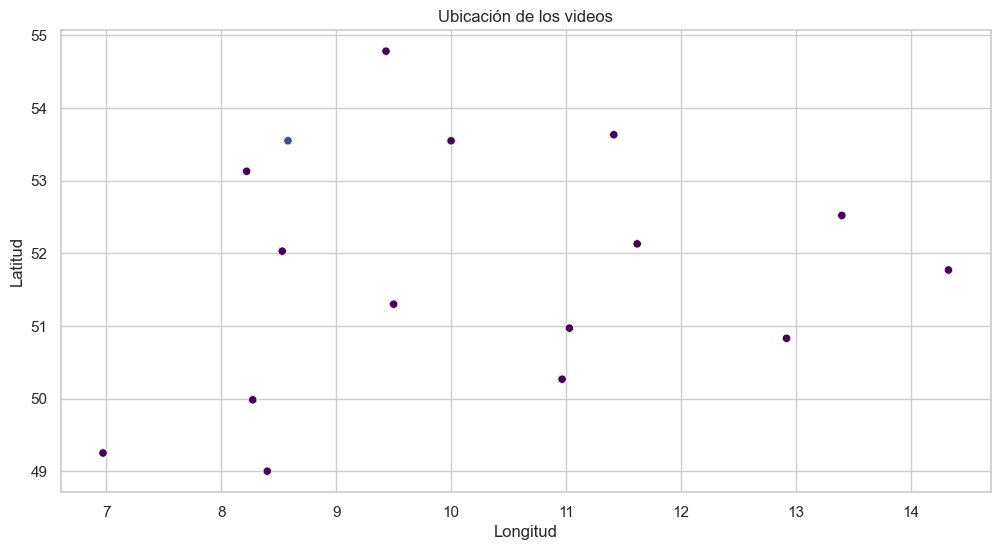

In [16]:
#Lat vs Lon
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lon', y='lat', data=df, hue='views', palette='viridis', legend=None)
plt.title('Ubicación de los videos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

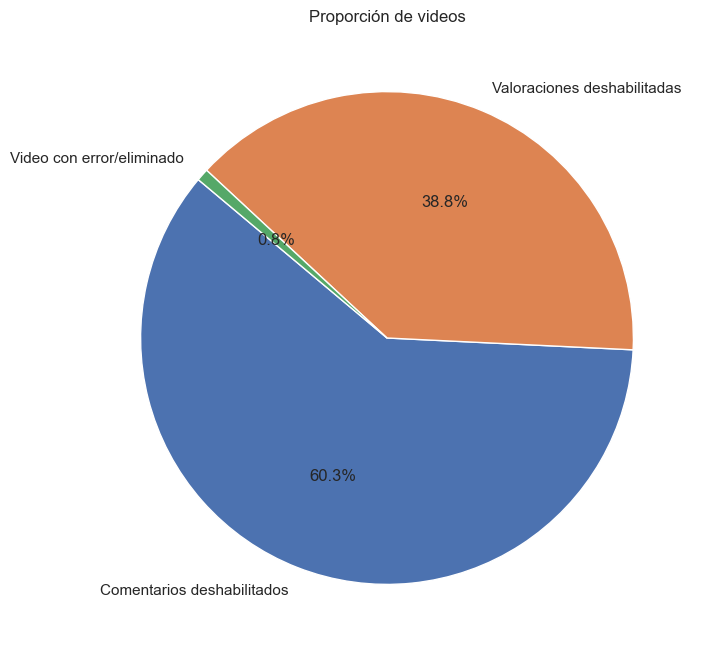

In [21]:
#Proporción de comentarios, valoraciones y errores
labels = ['Comentarios deshabilitados', 'Valoraciones deshabilitadas', 'Video con error/eliminado']
sizes = [
    df['comments_disabled'].mean() * 100,
    df['ratings_disabled'].mean() * 100,
    df['video_error_or_removed'].mean() * 100
]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de videos')
plt.show()

C:\Users\bruno\AppData\Local\Temp\ipykernel_23808\2314150178.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='views', y='channel_title', data=top_channels_views, palette='viridis')


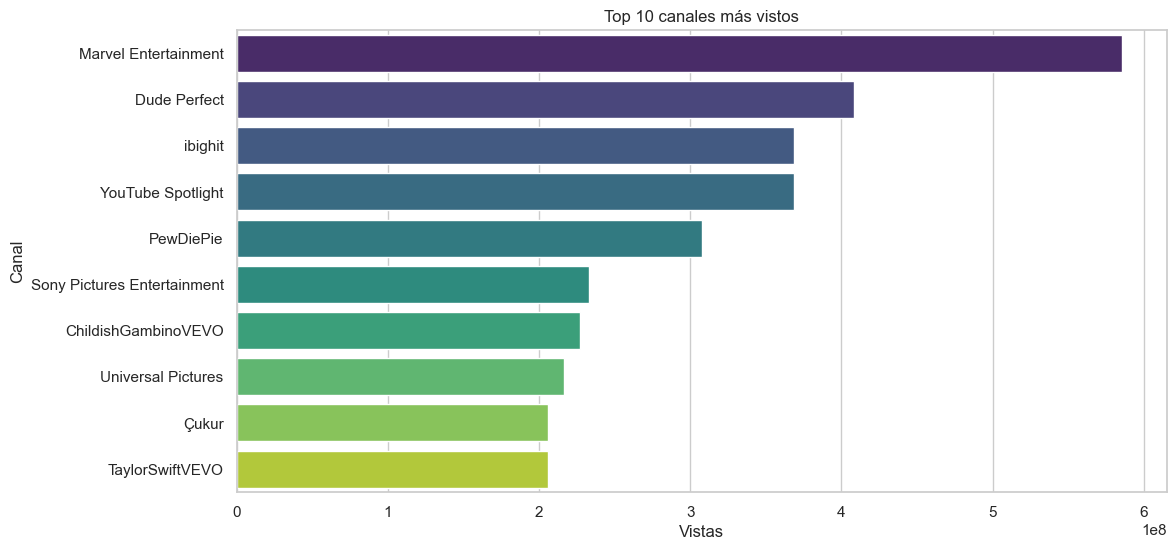

In [18]:
# Canales más vistos
plt.figure(figsize=(12, 6))
top_channels_views = df.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='views', y='channel_title', data=top_channels_views, palette='viridis')
plt.title('Top 10 canales más vistos')
plt.xlabel('Vistas')
plt.ylabel('Canal')
plt.show()

C:\Users\bruno\AppData\Local\Temp\ipykernel_23808\1745403838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='likes', y='channel_title', data=top_channels_likes, palette='coolwarm')


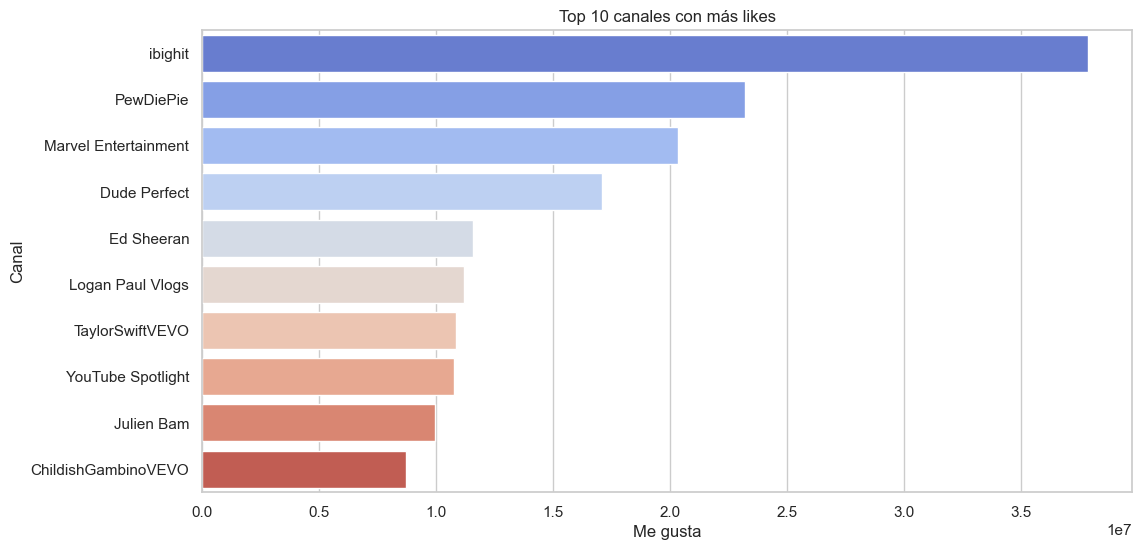

In [19]:
# Canales con más likes
plt.figure(figsize=(12, 6))
top_channels_likes = df.groupby('channel_title')['likes'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='likes', y='channel_title', data=top_channels_likes, palette='coolwarm')
plt.title('Top 10 canales con más likes')
plt.xlabel('Me gusta')
plt.ylabel('Canal')
plt.show()

C:\Users\bruno\AppData\Local\Temp\ipykernel_23808\1561596879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='comment_count', y='channel_title', data=top_channels_comments, palette='magma')


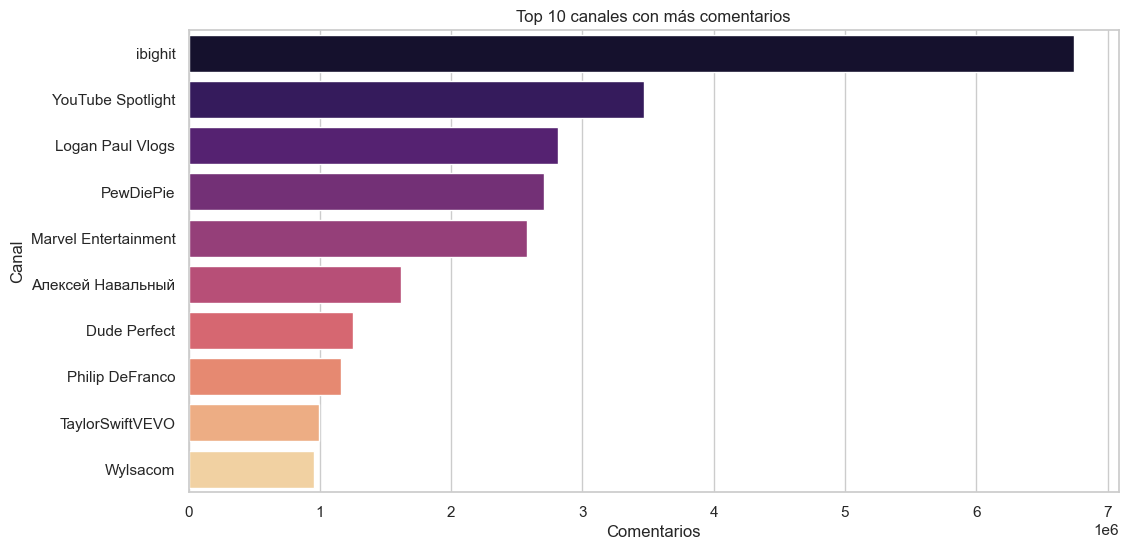

In [20]:
# Canales con más comentarios
plt.figure(figsize=(12, 6))
top_channels_comments = df.groupby('channel_title')['comment_count'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='comment_count', y='channel_title', data=top_channels_comments, palette='magma')
plt.title('Top 10 canales con más comentarios')
plt.xlabel('Comentarios')
plt.ylabel('Canal')
plt.show()

In [24]:
df['title_length'] = df['title'].apply(len)

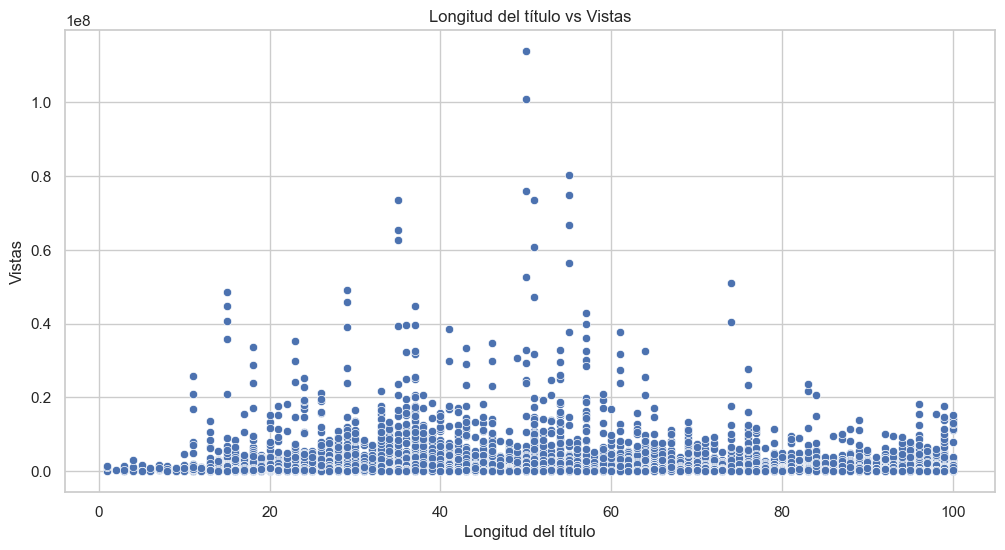

In [25]:
# Gráfico de dispersión: Longitud del título vs Vistas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='title_length', y='views', data=df)
plt.title('Longitud del título vs Vistas')
plt.xlabel('Longitud del título')
plt.ylabel('Vistas')
plt.show()

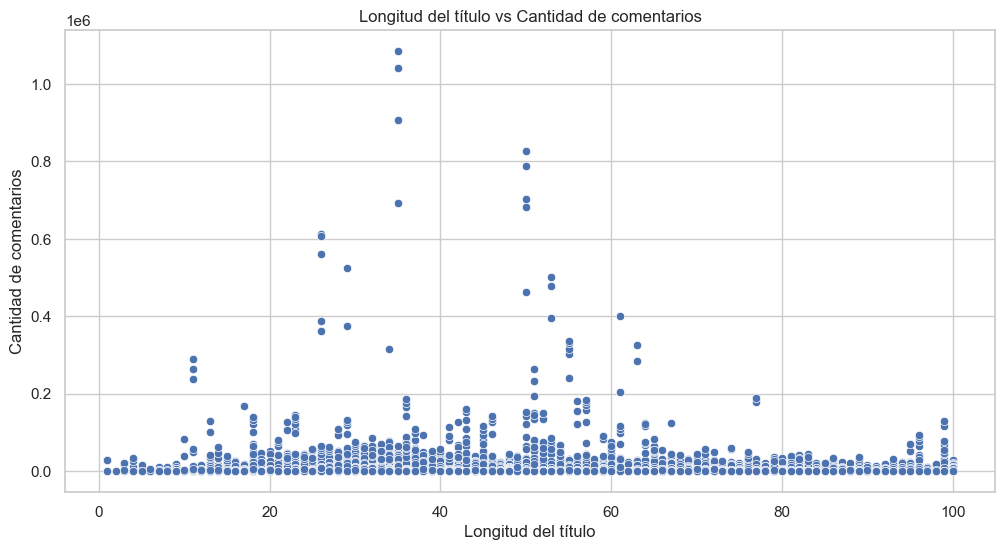

In [26]:
# Gráfico de dispersión: Longitud del título vs Cantidad de comentarios
plt.figure(figsize=(12, 6))
sns.scatterplot(x='title_length', y='comment_count', data=df)
plt.title('Longitud del título vs Cantidad de comentarios')
plt.xlabel('Longitud del título')
plt.ylabel('Cantidad de comentarios')
plt.show()

**VERIFICACION DE LA CALIDAD DE DATOS**

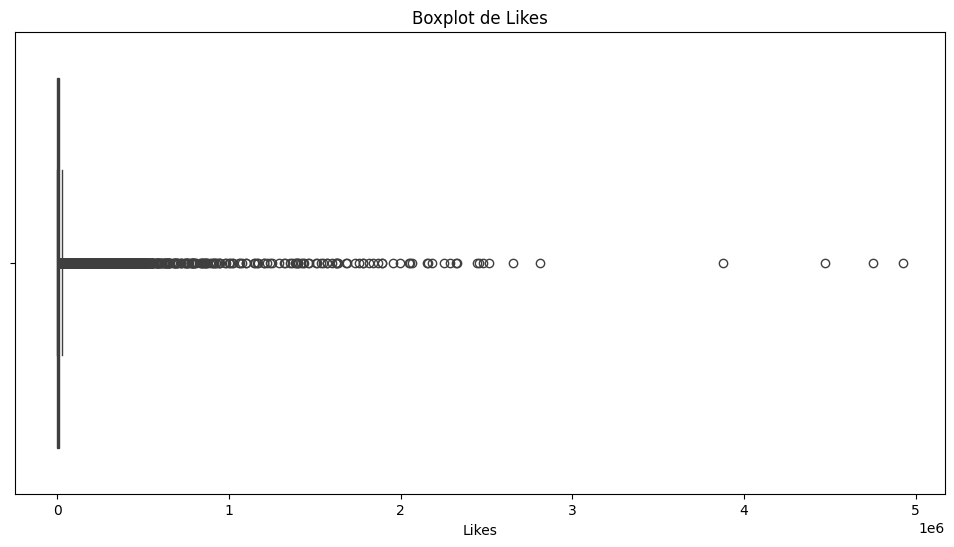

In [13]:
# Gráfico de boxplot: Likes
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['likes'])
plt.title('Boxplot de Likes')
plt.xlabel('Likes')
plt.show()

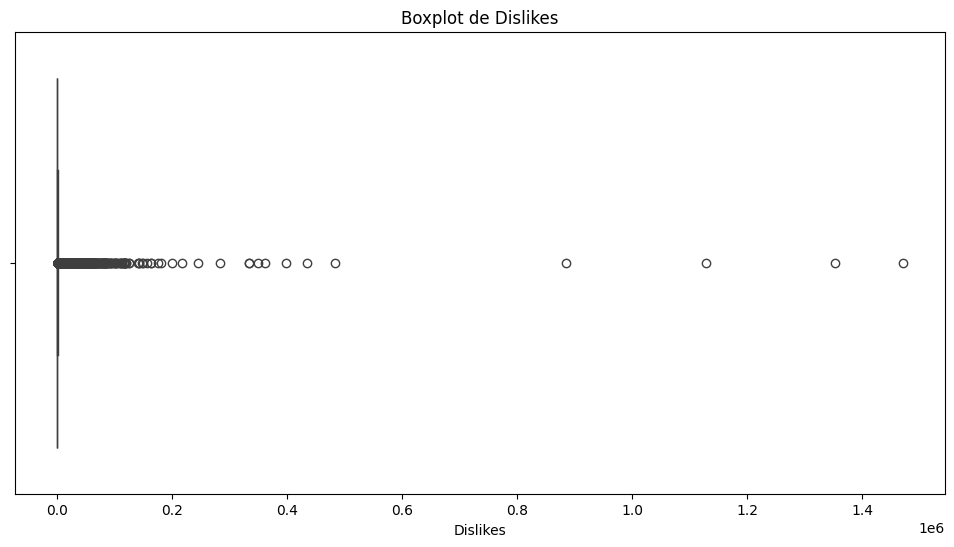

In [12]:
# Gráfico de boxplot: dislikes
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['dislikes'])
plt.title('Boxplot de Dislikes')
plt.xlabel('Dislikes')
plt.show()

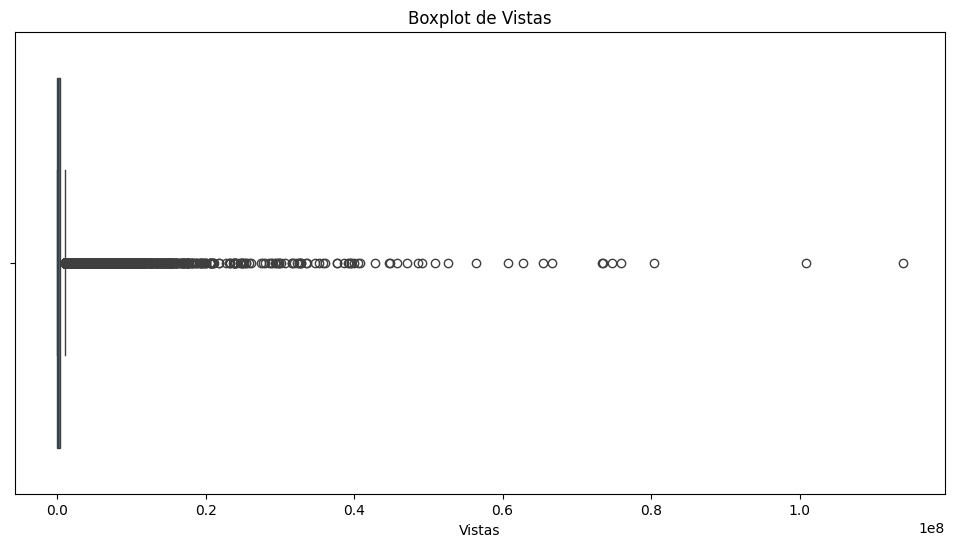

In [4]:
# Gráfico de boxplot: Views
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['views'])
plt.title('Boxplot de Vistas')
plt.xlabel('Vistas')
plt.show()

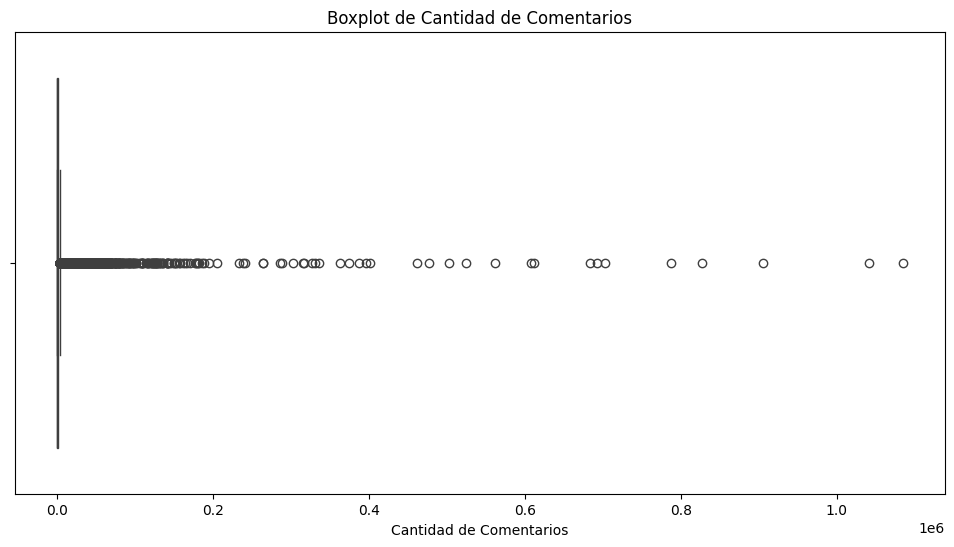

In [5]:
# Gráfico de boxplot: Comment Count
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['comment_count'])
plt.title('Boxplot de Cantidad de Comentarios')
plt.xlabel('Cantidad de Comentarios')
plt.show()

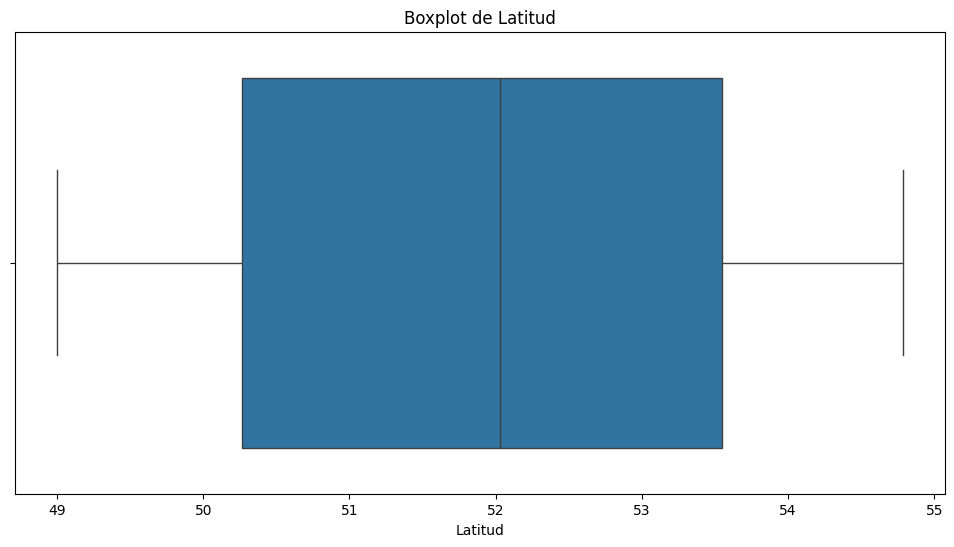

In [14]:
# Gráfico de boxplot: lat
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['lat'])
plt.title('Boxplot de Latitud')
plt.xlabel('Latitud')
plt.show()

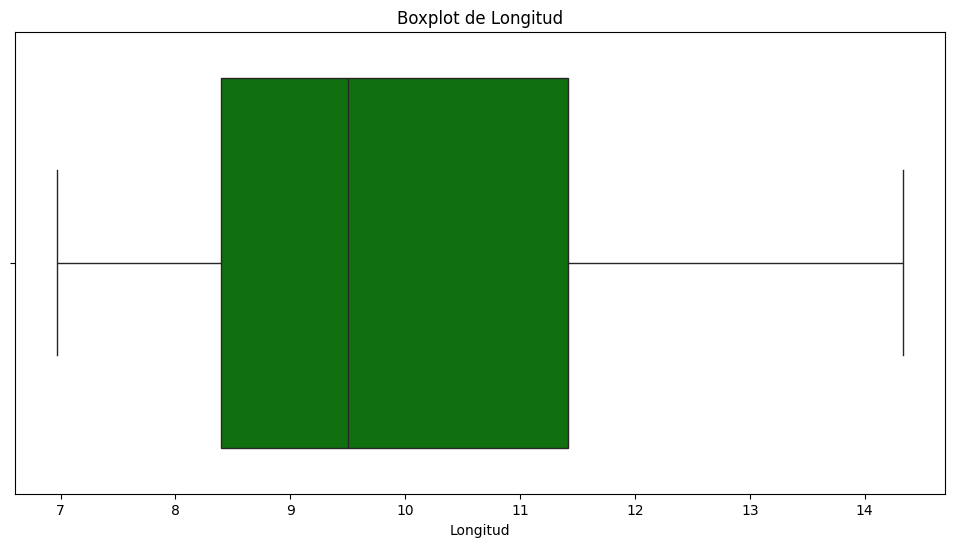

In [19]:
# Gráfico de boxplot: lon
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['lon'], color='g')
plt.title('Boxplot de Longitud')
plt.xlabel('Longitud')
plt.show()

**PROCESAMIENTO DE DATOS**

In [33]:
def remove_outliers_iqr(df, column):
    # Calcular el IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Definir los límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtrar los outliers
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [40]:
from scipy import stats

def remove_outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < threshold)
    df = df[filtered_entries]

In [39]:
df2 = df

In [42]:
remove_outliers_zscore(df2, 'views')

In [45]:
df2['views_log'] = np.log1p(df2['views'])

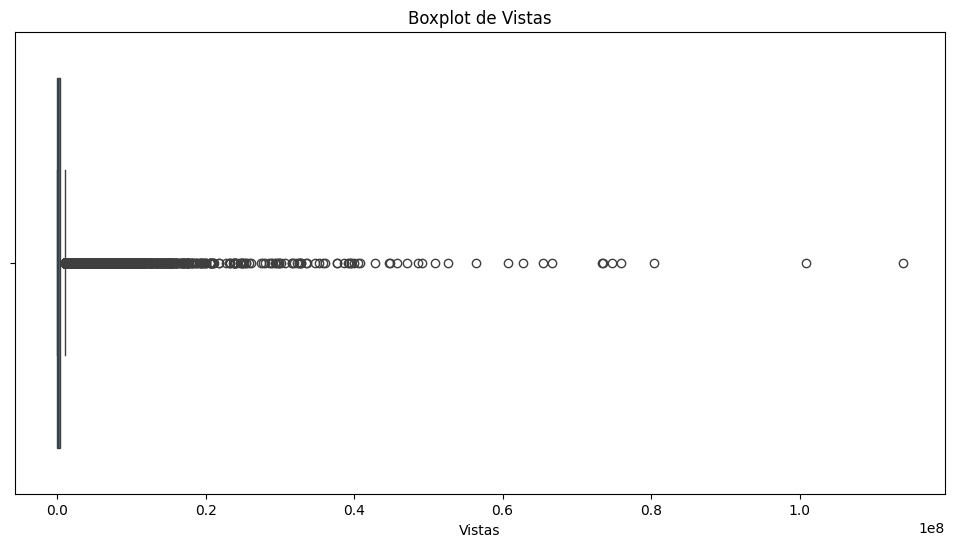

In [48]:
# Gráfico de boxplot: Views
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['views'])
plt.title('Boxplot de Vistas')
plt.xlabel('Vistas')
plt.show()

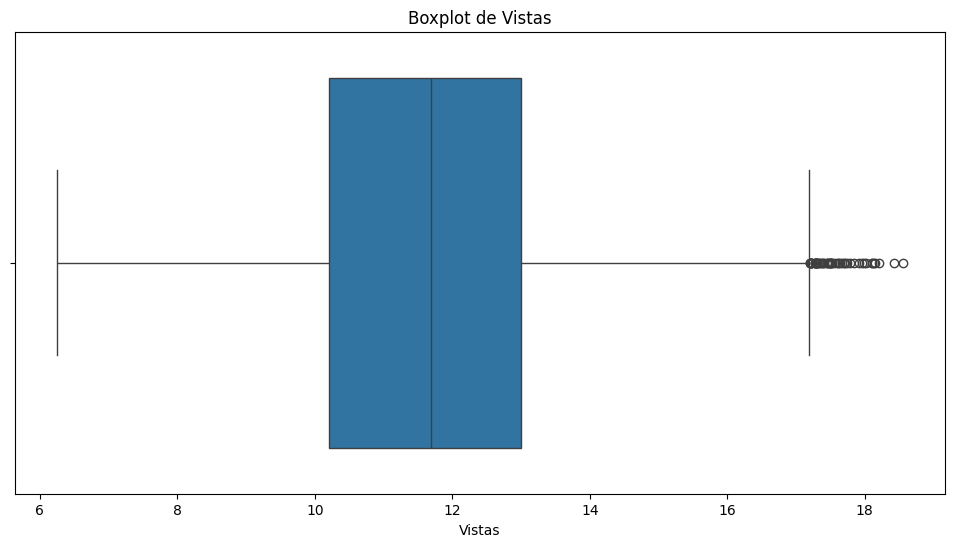

In [47]:
# Gráfico de boxplot: Views
plt.figure(figsize=(12, 6))
sns.boxplot(x=df2['views_log'])
plt.title('Boxplot de Vistas')
plt.xlabel('Vistas')
plt.show()

In [34]:
remove_outliers_iqr(df, 'views')

In [36]:
remove_outliers_iqr(df, 'likes')

In [37]:
remove_outliers_iqr(df, 'comment_count')

Al ver los valores nulos nos damos cuenta que hay `1552` valores vacios en la columna description, esto en principio no perjdicará el analisis y el modelo ya que es una variable cualitativa y en este contexto muchas veces los videos de YouTube se suben sin descripción y no es algo que se tome muy en cuenta al mirar un video

In [5]:
# obtener columnas importantes
columnas_importantes = ["video_id", "trending_date", "title", "channel_title",
                        "category_id", "publish_time", "tags", "views", 
                        "likes", "dislikes", "comment_count"
                    ]

In [6]:
df_filter = df[columnas_importantes]
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       40840 non-null  object
 1   trending_date  40840 non-null  object
 2   title          40840 non-null  object
 3   channel_title  40840 non-null  object
 4   category_id    40840 non-null  int64 
 5   publish_time   40840 non-null  object
 6   tags           40840 non-null  object
 7   views          40840 non-null  int64 
 8   likes          40840 non-null  int64 
 9   dislikes       40840 non-null  int64 
 10  comment_count  40840 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.4+ MB


In [7]:
len(df_filter.video_id.unique())

29627

El `video_id` es el identificador de cada video, al sacar los valores únicos vemos que hay muchos menos que en el dataframe original, por lo tanto se puede decir que hay valores repetidos, hay que ver cuales son esos valores para saber que hacer con ellos.

In [8]:
primer_id = df_filter.video_id.iloc[0]
df_filter[df_filter.video_id == primer_id]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539
203,LgVi6y5QIjM,17.15.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",551806,59963,875,2344
423,LgVi6y5QIjM,17.16.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",632932,65572,1022,2554
678,LgVi6y5QIjM,17.17.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",673401,68398,1068,2590


Esta salida nos muestra el progreso del video, como es que le ha ido en sus dias de trending, este primer video estuvo en trending por 4 días, desde el 14 de noviembre de 2017 hasta el 17 de noviembre del 2017, para cada uno de los días, tenemos su informació, como el numero de vistas, los likes, dislikes y cantidad de comentarios